In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

(51, 2)


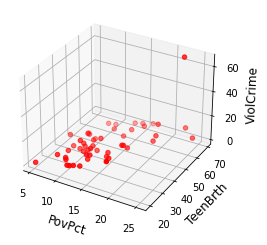

In [2]:
df = pd.read_csv('poverty.csv')
X = df[['PovPct','TeenBrth']]
X = X.to_numpy()
y = df['ViolCrime']
y = y.to_numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
ax.set_xlabel('PovPct',fontsize=12)
ax.set_ylabel('TeenBrth',fontsize=12)
ax.set_zlabel('ViolCrime',fontsize=12)
print(X.shape)

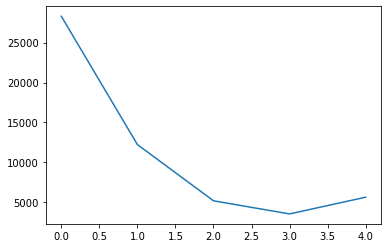

In [21]:
x_b = np.c_[np.ones((len(X),1)),X]
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std

m = len(y)
lr =0.01
n_iter = 5
# theta = np.random.randn(3,1)
theta_SGDM = np.array([[-10],[-10],[-10]])
j_cost_SGDM= np.zeros([n_iter])
theta_h1=[]
theta_h2=[]
### inicialización v
pred = np.dot(x_bs,theta_SGDM)
h=(pred - y)
v=(x_bs.T.dot(h))
v=np.zeros((3,1))
beta=0.9
for it in range(n_iter):
    cost =0.0
    for i in range(m):
        rand_ind = np.random.randint(0,m)
        X_i = x_bs[rand_ind,:].reshape(1,x_bs.shape[1])
        y_i = y[rand_ind].reshape(1,1)
        pred = np.dot(X_i,theta_SGDM)
        h=pred - y_i
        grad= X_i.T.dot((h))
        temp=beta*v
        v=beta*v+(1-beta)*grad
        theta_SGDM = theta_SGDM -lr*(v)
        theta_h1.append(theta_SGDM[1])
        theta_h2.append(theta_SGDM[2])
        cost +=np.sum(np.square(h))
    j_cost_SGDM[it]=cost
plt.plot(j_cost_SGDM)    

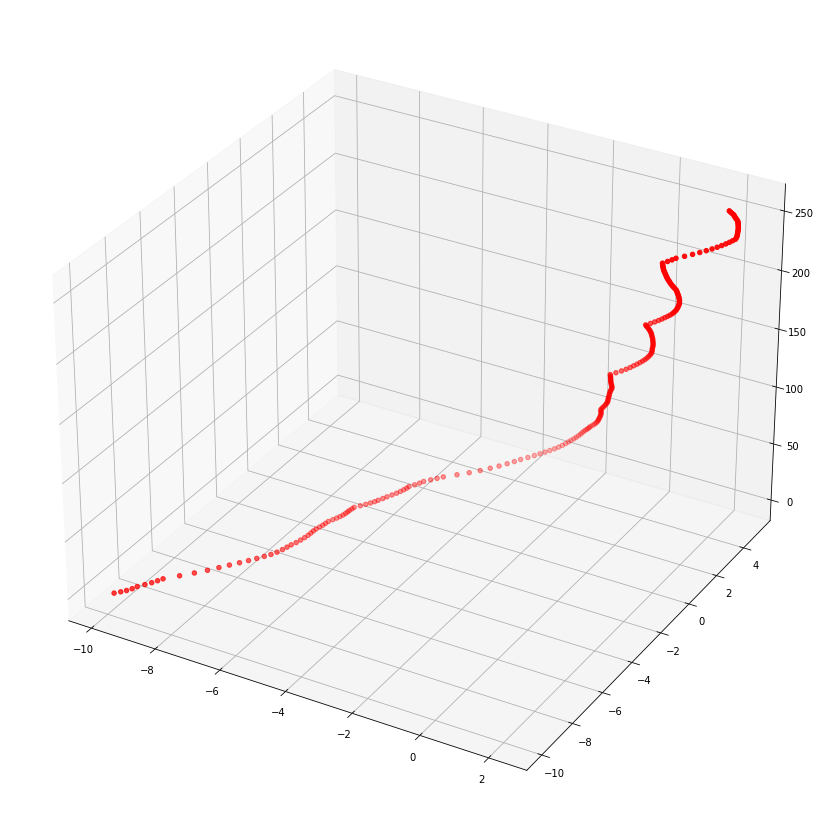

In [46]:
iteraciones=np.arange(len(theta_h2))
iteraciones=iteraciones.reshape(len(theta_h2),1)
theta_h1 = np.array(theta_h1)
theta_h2 = np.array(theta_h2)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta_h1,  theta_h2, iteraciones, c='r', marker='o')
# ax.plot(theta_h1,  theta_h2, iteraciones, label='SGDM')
# nIter=np.expand_dims(np.arange(ThetaGD.shape[0]),1) 